<a href="https://colab.research.google.com/github/sujitrajt/bootstrap4/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
import tensorflow

In [ ]:
import matplotlib

In [ ]:
import numpy

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

11490434/11490434 [==============================] - 0s 0us/step


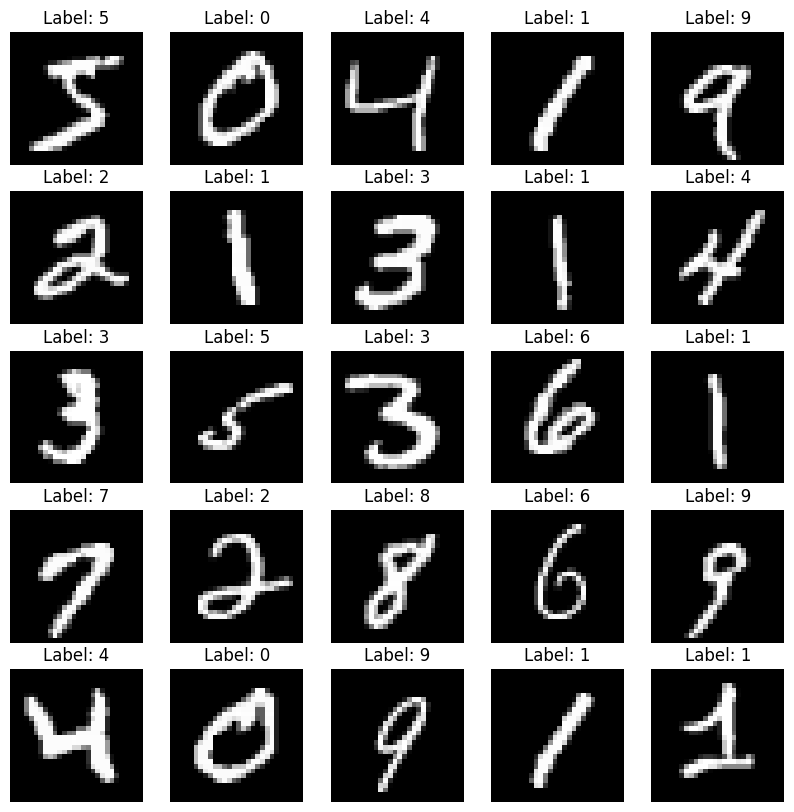

---------Testing Data Sample------------


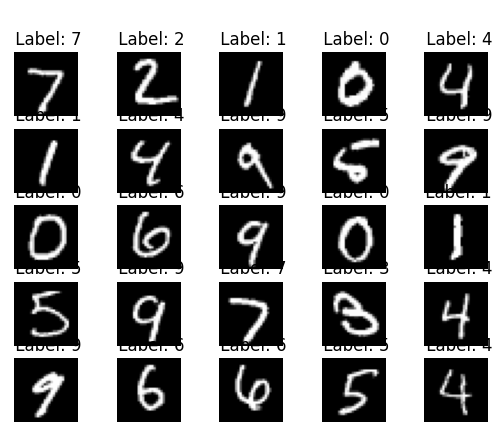

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
# creating two tuples trainset and testing set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display some training images
plt.figure(figsize=(10, 10))
for i in range(25):  # Display the first 25 images
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide the axis
plt.show()
print("---------Testing Data Sample------------")
# testing images sample
for i in range(25):  # Display the first 25 images
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray' )
    plt.title(f"\n Label: {test_labels[i]}")
    plt.axis('off')  # Hide the axis
plt.show()


# New Section

In [ ]:
# import tensorflow for neural network
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
# importing matplotlib for grahical representation
import matplotlib.pyplot as plt
# import numpy
import numpy as np

# Load the MNIST dataset and creating two divding them into training data and testing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data and dividing by 255 so that each image are integers in the range [0, 255], where 0 represents black and 255 represents white
train_images = train_images / 255.0
test_images = test_images / 255.0
# print(train_images)
#coverting the labels into numpy array
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels)





[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.3171 - accuracy: 0.9060 - val_loss: 0.1645 - val_accuracy: 0.9504
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.1290 - accuracy: 0.9609 - val_loss: 0.1186 - val_accuracy: 0.9641
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.1038 - val_accuracy: 0.9684
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0660 - accuracy: 0.9791 - val_loss: 0.1226 - val_accuracy: 0.9661
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9726
Test accuracy: 97.26%
313/313 [==============================] - 1s 2ms/step


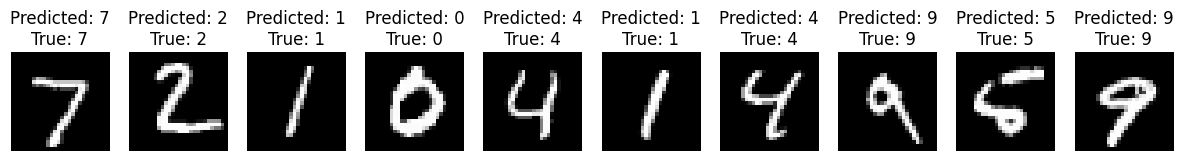

In [ ]:
#creating the model
# Sequential API allows you to create models layer-by-layer by stacking them ( another form of model is functinal)

model = Sequential([
    # Flattens the input. Flattening makes it a single column of 784 rows
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    # Fully connected first layer layer with 128 neurons and activation as relu
    Dense(128, activation='relu'),
    # Fully connected second layer layer with 128 neurons and activation as relu
    Dense(64, activation='relu'),
    # Fully connected third layer layer with 128 neurons and activation as relu
    Dense(64, activation='relu'),
    # Output layer with 10 neurons (one for each digit) softmax is used as activation function as it will classify into 10 digits (0 - 10)
    Dense(10, activation='softmax')
])
# Compile the model with adam optimizer,
# categorical-crossentropy : It calculates the cross-entropy loss between the true labels and the predicted probabilities for each class.
# model will be complied and showed output in terms of accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with epoch5
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test data
predictions = model.predict(test_images)

# Print some test images with their predicted labels using matplotlib
num_samples_to_display = 10  # number of samples taken from testing data
plt.figure(figsize=(15, 3))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    # print("pred_labrl",predicted_label)
    true_label = np.argmax(test_labels[i])
    # print("true_label",true_label)
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()

Epoch 1/5
750/750 [==============================] - 35s 44ms/step - loss: 0.2027 - accuracy: 0.9400 - val_loss: 0.0829 - val_accuracy: 0.9759
Epoch 2/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0656 - accuracy: 0.9810 - val_loss: 0.0616 - val_accuracy: 0.9813
Epoch 3/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 4/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0460 - accuracy: 0.9849
Test accuracy: 98.49%
313/313 [==============================] - 2s 6ms/step


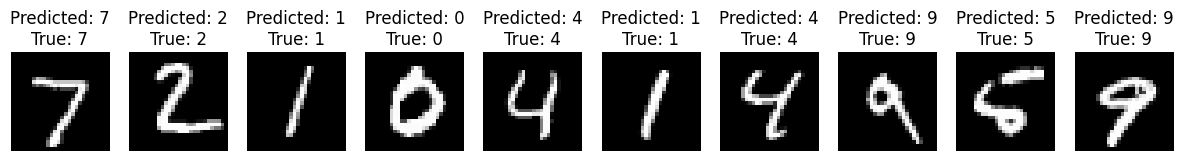

In [ ]:
#creating the model
# Sequential API allows you to create models layer-by-layer by stacking them ( another form of model is functinal)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
model = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
# Compile the model with adam optimizer,
# categorical-crossentropy : It calculates the cross-entropy loss between the true labels and the predicted probabilities for each class.
# model will be complied and showed output in terms of accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with epoch5
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test data
predictions = model.predict(test_images)

# Print some test images with their predicted labels using matplotlib
num_samples_to_display = 10  # number of samples taken from testing data
plt.figure(figsize=(15, 3))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    # print("pred_labrl",predicted_label)
    true_label = np.argmax(test_labels[i])
    # print("true_label",true_label)
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()